In [1]:
import pandas as pd
import numpy as np
import  matplotlib.pyplot as plt
import seaborn as sn
from numpy import linalg as LA
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
import math

In [2]:
headers = list(pd.read_csv("student-mat-headers.csv") )
data = pd.read_csv("student-mat.csv", names=headers, index_col=False, skiprows = [0], delimiter=";") 
# Preview the first 5 lines of the loaded data 
data = data.drop("G1", axis=1)
data = data.drop("G2", axis=1)
Y = 'G3'
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,4,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,10,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,2,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,4,10


In [3]:
# creating a dict file  
school_dict = {'GP': 1,'MS': 0} 
sex_dict = {'M': 1,'F': 0} 
address_dict = {'U': 0,'R': 1} 
famsize_dict = {'LE3' : 0, 'GT3': 1} 
pstatus_dict = {'T': 0,'A': 1} 
mjob_dict = {'teacher': 0, 'health' : 1,'services' : 2, 'at_home' : 3, 'other': 4}
fjob_dict = {'teacher': 0, 'health' : 1,'services' : 2, 'at_home' : 3, 'other': 4}
reason_dict = {'home': 0,'reputation': 1, 'course': 2, 'other': 3}
guardian_dict = {'mother': 0, 'father': 1, 'other': 2}
schoolsup_dict = {'yes': 1, 'no': 0}
famsup_dict = {'yes': 1, 'no': 0}
paid_dict = {'yes': 1, 'no': 0}
activities_dict = {'yes': 1, 'no': 0}
nursery_dict = {'yes': 1, 'no': 0}
higher_dict = {'yes': 1, 'no': 0}
internet_dict = {'yes': 1, 'no': 0}
romantic_dict = {'yes': 1, 'no': 0}


In [4]:
data.school = [school_dict[item] for item in data.school] 
data.sex = [sex_dict[item] for item in data.sex]
data.address = [address_dict[item] for item in data.address]
data.famsize = [famsize_dict[item] for item in data.famsize]
data.Pstatus = [pstatus_dict[item] for item in data.Pstatus]
data.Mjob = [mjob_dict[item] for item in data.Mjob]
data.Fjob = [fjob_dict[item] for item in data.Fjob]
data.reason = [reason_dict[item] for item in data.reason]
data.guardian = [guardian_dict[item] for item in data.guardian]
data.schoolsup = [schoolsup_dict[item] for item in data.schoolsup]
data.famsup = [famsup_dict[item] for item in data.famsup]
data.paid = [paid_dict[item] for item in data.paid]
data.activities = [activities_dict[item] for item in data.activities]
data.nursery = [nursery_dict[item] for item in data.nursery]
data.higher = [higher_dict[item] for item in data.higher]
data.internet = [internet_dict[item] for item in data.internet]
data.romantic = [romantic_dict[item] for item in data.romantic]

In [5]:
data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G3
0,1,0,18,0,1,1,4,4,3,0,...,0,0,4,3,4,1,1,3,6,6
1,1,0,17,0,1,0,1,1,3,4,...,1,0,5,3,3,1,1,3,4,6
2,1,0,15,0,0,0,1,1,3,4,...,1,0,4,3,2,2,3,3,10,10
3,1,0,15,0,1,0,4,2,1,2,...,1,1,3,2,2,1,1,5,2,15
4,1,0,16,0,1,0,3,3,4,4,...,0,0,4,3,2,1,2,5,4,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,0,1,20,0,0,1,2,2,2,2,...,0,0,5,5,4,4,5,4,11,9
391,0,1,17,0,0,0,3,1,2,2,...,1,0,2,4,5,3,4,2,3,16
392,0,1,21,1,1,0,1,1,4,4,...,0,0,5,5,3,3,3,3,3,7
393,0,1,18,1,0,0,3,2,2,4,...,1,0,4,4,1,3,4,5,0,10


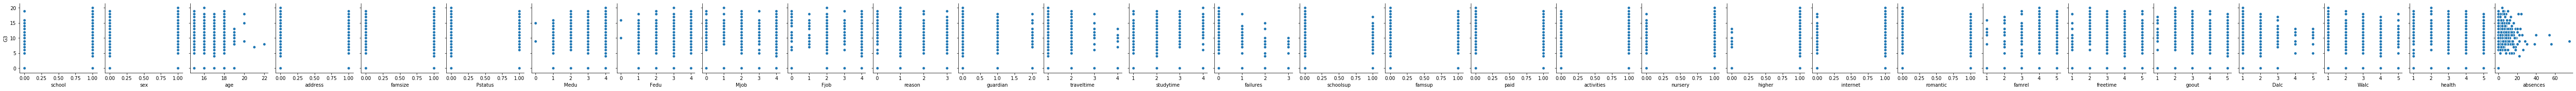

In [6]:
sns = sn.pairplot(data, y_vars=["G3"], x_vars=data.columns[:-1])
sns.savefig("output.png")

In [7]:
def norm_vector(vector):
    return LA.norm(vector)

def normalize_vector(vector):
    return np.array(vector) * (1/norm_vector(vector))

for column in data:
   # Select column contents by column name using [] operator
   columnSeriesObj = normalize_vector(data[column])
   #print('Colunm Name : ', column)
   #print('Column Contents : ', columnSeriesObj)
   data[column] = columnSeriesObj

In [8]:
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G3
0,0.053529,0.0,0.054087,0.0,0.059655,0.156174,0.068022,0.073299,0.052762,0.000000,...,0.000000,0.000000,0.049760,0.044583,0.060957,0.029123,0.019149,0.039556,0.030735,0.026538
1,0.053529,0.0,0.051082,0.0,0.059655,0.000000,0.017005,0.018325,0.052762,0.062363,...,0.055132,0.000000,0.062199,0.044583,0.045718,0.029123,0.019149,0.039556,0.020490,0.026538
2,0.053529,0.0,0.045073,0.0,0.000000,0.000000,0.017005,0.018325,0.052762,0.062363,...,0.055132,0.000000,0.049760,0.044583,0.030478,0.058247,0.057448,0.039556,0.051226,0.044230
3,0.053529,0.0,0.045073,0.0,0.059655,0.000000,0.068022,0.036649,0.017587,0.031182,...,0.055132,0.087039,0.037320,0.029722,0.030478,0.029123,0.019149,0.065927,0.010245,0.066344
4,0.053529,0.0,0.048078,0.0,0.059655,0.000000,0.051016,0.054974,0.070349,0.062363,...,0.000000,0.000000,0.049760,0.044583,0.030478,0.029123,0.038299,0.065927,0.020490,0.044230


In [9]:
def cosine_squared(u, v):
    uTv = np.matmul(np.transpose(u),v)
    uTu = np.matmul(np.transpose(u),u)
    vTv = np.matmul(np.transpose(v),v)
    return pow(uTv, 2)/(uTu * vTv)

In [10]:
def max_cosine(data, out_columns, Y):
    best = -10000
    #print(out_columns)
    for column in data:
        if column not in out_columns:
            j = cosine_squared(data[column], data[Y])
            if (j > best):
                best = j
                max_cos = column
    
    return (max_cos, best)

In [11]:
def projection_orthogonal(vector, base):
    return np.subtract(vector, projection(vector, base))

def projection(vector, base):
    #print(vector)
    
    proj = np.zeros(len(vector))
    for w in base:
        x = np.inner(data[w], vector)
        proj = np.add(proj, x * data[w])
    
    return proj


In [12]:
out_columns = [Y]
ordered_features = []
for k in range(len(data.columns) - 1):
    max_similarity, value = max_cosine(data,out_columns, Y)
    out_columns.append(max_similarity)
    ordered_features.append(max_similarity)
    print("k {} : {}".format(k, max_similarity))
    
    for col in data:
        if col not in out_columns or col == Y:
            print("reprojetando {}".format(col))
            p = projection_orthogonal(data[col], data[ordered_features])
            data[col] = p
    
    
ordered_features

k 0 : higher
reprojetando school
reprojetando sex
reprojetando age
reprojetando address
reprojetando famsize
reprojetando Pstatus
reprojetando Medu
reprojetando Fedu
reprojetando Mjob
reprojetando Fjob
reprojetando reason
reprojetando guardian
reprojetando traveltime
reprojetando studytime
reprojetando failures
reprojetando schoolsup
reprojetando famsup
reprojetando paid
reprojetando activities
reprojetando nursery
reprojetando internet
reprojetando romantic
reprojetando famrel
reprojetando freetime
reprojetando goout
reprojetando Dalc
reprojetando Walc
reprojetando health
reprojetando absences
reprojetando G3
k 1 : Medu
reprojetando school
reprojetando sex
reprojetando age
reprojetando address
reprojetando famsize
reprojetando Pstatus
reprojetando Fedu
reprojetando Mjob
reprojetando Fjob
reprojetando reason
reprojetando guardian
reprojetando traveltime
reprojetando studytime
reprojetando failures
reprojetando schoolsup
reprojetando famsup
reprojetando paid
reprojetando activities
repr

reprojetando activities
reprojetando nursery
reprojetando Dalc
reprojetando Walc
reprojetando health
reprojetando G3
k 19 : Walc
reprojetando school
reprojetando Fedu
reprojetando Mjob
reprojetando guardian
reprojetando traveltime
reprojetando paid
reprojetando activities
reprojetando nursery
reprojetando Dalc
reprojetando health
reprojetando G3
k 20 : school
reprojetando Fedu
reprojetando Mjob
reprojetando guardian
reprojetando traveltime
reprojetando paid
reprojetando activities
reprojetando nursery
reprojetando Dalc
reprojetando health
reprojetando G3
k 21 : Mjob
reprojetando Fedu
reprojetando guardian
reprojetando traveltime
reprojetando paid
reprojetando activities
reprojetando nursery
reprojetando Dalc
reprojetando health
reprojetando G3
k 22 : paid
reprojetando Fedu
reprojetando guardian
reprojetando traveltime
reprojetando activities
reprojetando nursery
reprojetando Dalc
reprojetando health
reprojetando G3
k 23 : Dalc
reprojetando Fedu
reprojetando guardian
reprojetando travel

['higher',
 'Medu',
 'age',
 'famrel',
 'failures',
 'sex',
 'studytime',
 'internet',
 'absences',
 'romantic',
 'goout',
 'famsup',
 'freetime',
 'schoolsup',
 'address',
 'reason',
 'Pstatus',
 'famsize',
 'Fjob',
 'Walc',
 'school',
 'Mjob',
 'paid',
 'Dalc',
 'activities',
 'health',
 'nursery',
 'guardian',
 'traveltime',
 'Fedu']

In [13]:
def rmse(targets, predictions):
    return np.sqrt(((predictions - targets) ** 2).mean())

def select_bests_params(results):
    df_results = pd.DataFrame(results)
    return df_results.sort_values([1],  ascending=True)


In [14]:
results = []
for i in range(len(ordered_features)):
    d =  data[ordered_features[:i+1]].values
    X_train, X_test, y_train, y_test = train_test_split(d,  data['G3'].values, test_size=0.3, random_state=42)
    # Create linear regression object
    regr = linear_model.LinearRegression()

    # Train the model using the training sets
    regr.fit(X_train, y_train)

    # Make predictions using the testing set
    y_pred = regr.predict(X_test)
    #The coefficients
    #print("{} - {}".format(i, ordered_features[:i+1]))
    #print('Coefficients: \n', regr.coef_)
    # The mean squared error
    rmse_result = rmse(y_test, y_pred)
    #print(rmse_result)
    results.append([i, rmse_result])

ranking = select_bests_params(results)
graph_result = pd.DataFrame(results)
print(ranking)


     0         1
2    2  0.018205
3    3  0.018313
4    4  0.018336
10  10  0.018339
0    0  0.018344
11  11  0.018346
7    7  0.018359
13  13  0.018360
8    8  0.018361
12  12  0.018363
9    9  0.018367
6    6  0.018370
5    5  0.018381
15  15  0.018390
14  14  0.018400
16  16  0.018402
1    1  0.018406
18  18  0.018415
17  17  0.018418
19  19  0.018419
20  20  0.018491
21  21  0.018497
22  22  0.018651
23  23  0.018679
25  25  0.018680
24  24  0.018682
28  28  0.018716
26  26  0.018741
27  27  0.018745
29  29  0.018946


In [15]:
plt.plot( graph_result[0], graph_result[1],  marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)
#plt.plot(graph_result[0], graph_result[2],  marker='', color='olive', linewidth=2)
plt.savefig("data.png")
plt.clf()

<Figure size 432x288 with 0 Axes>

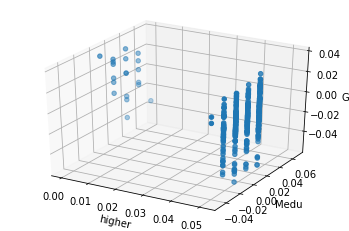

In [27]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data['higher'], data['Medu'],  data['G3'])
ax.set_xlabel('higher')
ax.set_zlabel('G3')
ax.set_ylabel('Medu')

plt.show()